In [ ]:
# import the required Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# remove warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# import the Flights dataset

data = pd.read_csv("/content/airlines_flights_data.csv", engine='python', on_bad_lines='skip')
data.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


In [ ]:
# remove the 'index' column
if 'index' in data.columns:
	data = data.drop('index', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262483 entries, 0 to 262482
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           262483 non-null  object 
 1   flight            262483 non-null  object 
 2   source_city       262483 non-null  object 
 3   departure_time    262483 non-null  object 
 4   stops             262483 non-null  object 
 5   arrival_time      262480 non-null  object 
 6   destination_city  262480 non-null  object 
 7   class             262480 non-null  object 
 8   duration          262478 non-null  float64
 9   days_left         262474 non-null  float64
 10  price             262470 non-null  float64
dtypes: float64(3), object(8)
memory usage: 22.0+ MB


In [ ]:
# Get Statistical summary about the dataset
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
data[ data['duration'] == 49.830000 ]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
16513,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2.0,23891.0
16983,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9.0,17538.0


In [ ]:
data[data['duration']==0.830000].value_counts()

airline  flight   source_city  departure_time  stops  arrival_time   destination_city  class    duration  days_left  price 
Indigo   6E-357   Bangalore    Night           zero   Night          Chennai           Economy  0.83      6.0        3498.0    1
                                                                                                          7.0        3498.0    1
                                                                                                          8.0        3498.0    1
                                                                                                          9.0        3498.0    1
                                                                                                          10.0       3498.0    1
                                                                                                          11.0       3498.0    1
                                                                                                          12.0       3498.0    1
                                                                                                          13.0       3498.0    1
                                                                                                          14.0       3498.0    1
                                                                                                          16.0       1924.0    1
                                                                                                          18.0       1924.0    1
                                                                                                          19.0       1924.0    1
                                                                                                          20.0       1924.0    1
                                                                                                          21.0       1924.0    1
                                                                                                          22.0       1924.0    1
                                                                                                          23.0       1924.0    1
                                                                                                          24.0       1924.0    1
                                                                                                          25.0       1924.0    1
                                                                                                          26.0       1924.0    1
                                                                                                          27.0       1924.0    1
                                                                                                          28.0       1924.0    1
                                                                                                          29.0       1924.0    1
                                                                                                          30.0       1924.0    1
                                                                                                          31.0       1604.0    1
                                                                                                          32.0       1604.0    1
                                                                                                          33.0       1604.0    1
                                                                                                          34.0       1604.0    1
                                                                                                          35.0       1604.0    1
                                                                                                          36.0       1604.0    1
                                                                                                          37.0       1604.0    1
      

In [ ]:
data[data['price']==123071.000000]


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
148431,Vistara,UK-772,Kolkata,Morning,one,Night,Delhi,Business,13.5,3.0,123071.0


In [ ]:
data[data['price']==1105.000000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
39320,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,16.0,1105.0
39321,GO_FIRST,G8-505,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.25,16.0,1105.0
39421,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,17.0,1105.0
39422,GO_FIRST,G8-505,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.25,17.0,1105.0
39516,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,18.0,1105.0
...,...,...,...,...,...,...,...,...,...,...,...
42114,Indigo,6E-7261,Chennai,Morning,one,Evening,Hyderabad,Economy,7.92,49.0,1105.0
42115,Indigo,6E-611,Chennai,Evening,one,Late_Night,Hyderabad,Economy,8.25,49.0,1105.0
42116,Indigo,6E-581,Chennai,Morning,one,Evening,Hyderabad,Economy,9.17,49.0,1105.0
42117,Indigo,6E-7127,Chennai,Afternoon,one,Night,Hyderabad,Economy,9.50,49.0,1105.0


In [ ]:
# check the missing value in the dataset
data.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,3
destination_city,3
class,3
duration,5
days_left,9


In [ ]:
# check the duplicates in the data
data.duplicated().sum()

np.int64(0)

## Q.1. What are the airlines in the dataset, accompanied by their frequencies?


In [ ]:
# showing all the airlines with their frequency
data['airline'].value_counts()

,count
airline,
Vistara,114467
Air_India,72255
Indigo,34405
GO_FIRST,20058
AirAsia,13485
SpiceJet,7810
Kolkata,1
Evening,1
Hyderabad,1


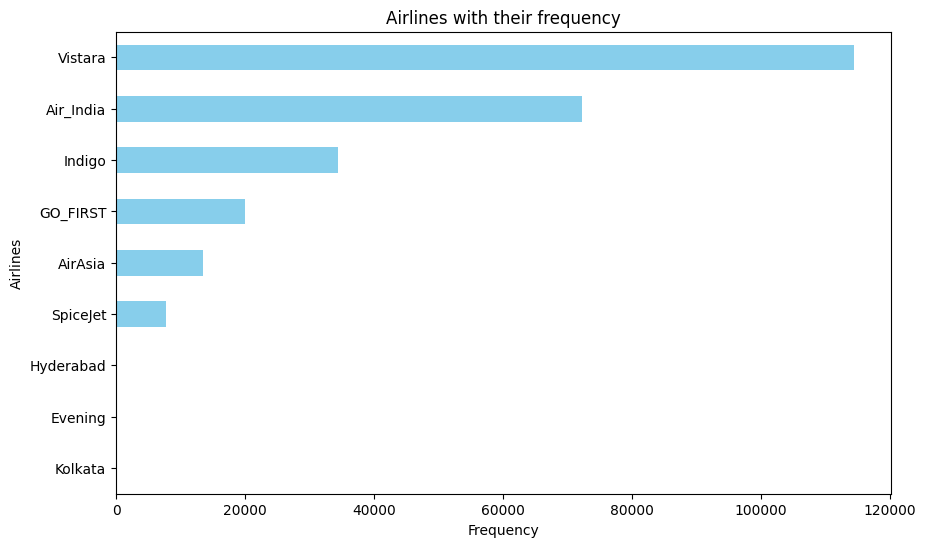

In [ ]:
# showing the airlines with their frequecy in a horizantal bar plot
plt.figure(figsize=(10,6))
data['airline'].value_counts(ascending=True).plot(kind='barh' , color='skyblue')
plt.title('Airlines with their frequency')
plt.xlabel('Frequency')
plt.ylabel('Airlines')
plt.show()

### Observations:
- **Vistara** has the highest number of flights in the dataset (more than 120,000).  
- **Air India** and **Indigo** follow as the next most frequent airlines.  
- **SpiceJet** has the lowest frequency among all listed airlines.  
- This indicates that the dataset is dominated by a few major airlines.


Q.2. Show Bar graph representing the Departure Time and Arrival Time

In [ ]:
#Showing the departure time for the flights
data['departure_time'].value_counts()

,count
departure_time,
Morning,61909
Evening,59177
Early_Morning,58204
Afternoon,41025
Night,40894
Late_Night,1268
35,1
Chennai,1
Kolkata,1


In [ ]:
# Showing the arrival time of the flights
data['arrival_time'].value_counts()

,count
arrival_time,
Night,79651
Evening,68880
Morning,55592
Afternoon,33240
Early_Morning,13878
Late_Night,11232
Afternoomy,1
13.5,1
Mor,1


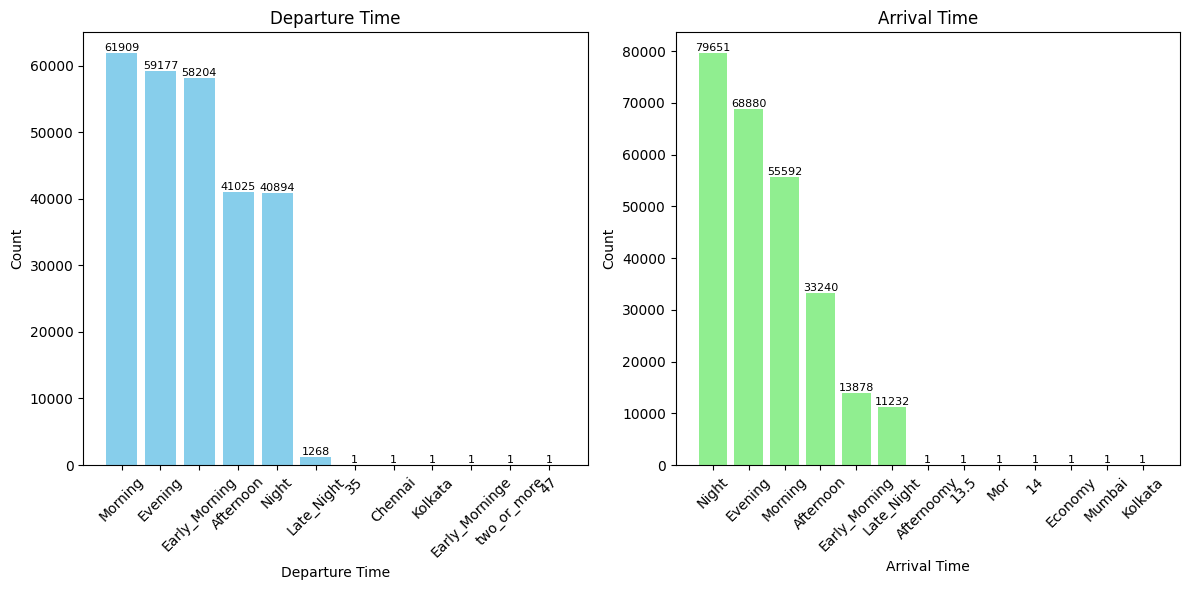

In [ ]:
# showing the Departure time and Arrival time for the flights with their counts

# Count values
departure_counts = data['departure_time'].value_counts()
arrival_counts = data['arrival_time'].value_counts()

plt.figure(figsize=(12, 6))

# Departure Time Plot
plt.subplot(1, 2, 1)
bars1 = plt.bar(departure_counts.index, departure_counts.values, color='skyblue')
plt.title('Departure Time')
plt.xlabel('Departure Time')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add values on top of Departure bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval,
             f'{yval}', ha='center', va='bottom', fontsize=8)

# Arrival Time Plot
plt.subplot(1, 2, 2)
bars2 = plt.bar(arrival_counts.index, arrival_counts.values, color='lightgreen')
plt.title('Arrival Time')
plt.xlabel('Arrival Time')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add values on top of Arrival bars
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval,
             f'{yval}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


### Observations:
**Departure Time:**  
- Most flights depart in the **Morning (71,000+)**, followed by **Early Morning (66,000+)** and **Evening (65,000+)**.  
- Very few flights leave in **Late Night (1,300)**.  

**Arrival Time:**  
- Most flights arrive at **Night (91,000+)** and **Evening (78,000+)**.  
- The lowest number of arrivals occur in **Late Night (14,000)** and **Early Morning (15,000)**.


## Q.3. Show Bar Graphs representing the Source City & Destination City

In [ ]:
# Showing the Source City of the flights
data['source_city'].value_counts()

,count
source_city,
Delhi,61340
Mumbai,60893
Bangalore,52059
Kolkata,46347
Chennai,28520
Hyderabad,13319
5.58,1
Bning,1
Early_Morning,1


In [ ]:
# Showing the Destination city of the flights
data['destination_city'].value_counts()

,count
destination_city,
Mumbai,48986
Bangalore,45903
Delhi,44728
Kolkata,43919
Hyderabad,42723
Chennai,36212
Business,2
13.92,1
26,1


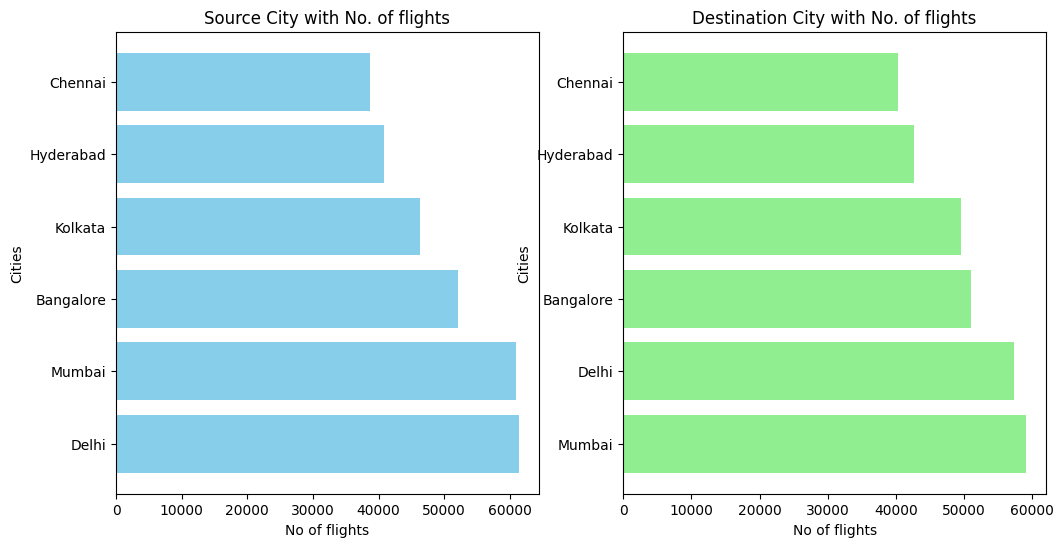

In [ ]:
# Showing the Source city and Destination city for the flights with their counts in a horizontal bar plot
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.barh(data['source_city'].value_counts().index, data['source_city'].value_counts().values, color='skyblue')
plt.title('Source City with No. of flights')
plt.ylabel('Cities')
plt.xlabel('No of flights')

plt.subplot(1,2,2)
plt.barh(data['destination_city'].value_counts().index, data['destination_city'].value_counts().values, color='lightgreen')
plt.title('Destination City with No. of flights')
plt.ylabel('Cities')
plt.xlabel('No of flights')

plt.show()

### Observations:
- **Source City:** Delhi and Mumbai are the most common departure cities.  
- Bengaluru and Kolkata also contribute significantly to departures.  
- Chennai has the least number of flights in this dataset.  

- **Destination City:** Mumbai is the most frequent destination followed by Mumbai and Delhi.  


## Q.4. Does price varies with airlines ?

In [ ]:
# Grouping the airline and checking their mean price
data.groupby('airline')['price'].mean()

,price
airline,
AirAsia,4233.336670
Air_India,25472.492166
Evening,NaN
GO_FIRST,5762.287466
Hyderabad,NaN
Indigo,5398.682935
Kolkata,NaN
SpiceJet,6204.000768
Vistara,33050.020120


<Figure size 1500x800 with 0 Axes>

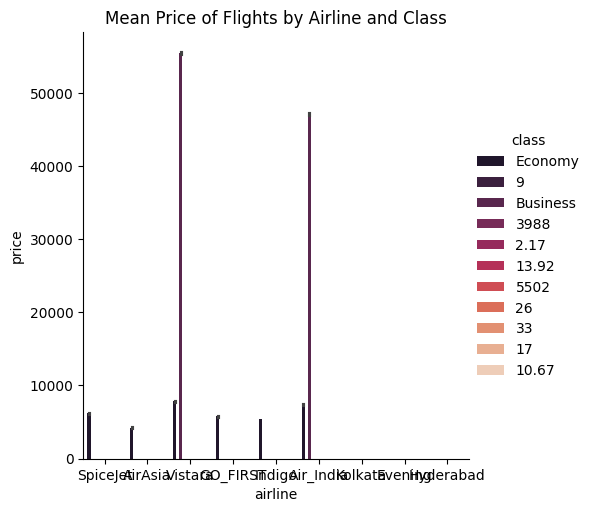

In [ ]:
# Drawing a category plot for the airlines and their mean price
plt.figure(figsize=(15, 8))
sns.catplot( x='airline', y='price', kind = 'bar', palette='rocket',data= data, hue='class')
plt.title('Mean Price of Flights by Airline and Class')
plt.show()

### Observations:
- Yes, **price significantly varies by airline and class**:
    - **Business class tickets** for **Vistara** and **Air India** are the most expensive, averaging around **55,000**.  
    - **Economy class** prices remain much lower, with **AirAsia** offering the most affordable fares.  
    - Budget airlines like **GO_FIRST**, **Indigo**, and **SpiceJet** maintain consistent and lower ticket prices.


## Q.5. Which airline offers the cheapest average price for Economy class flights?


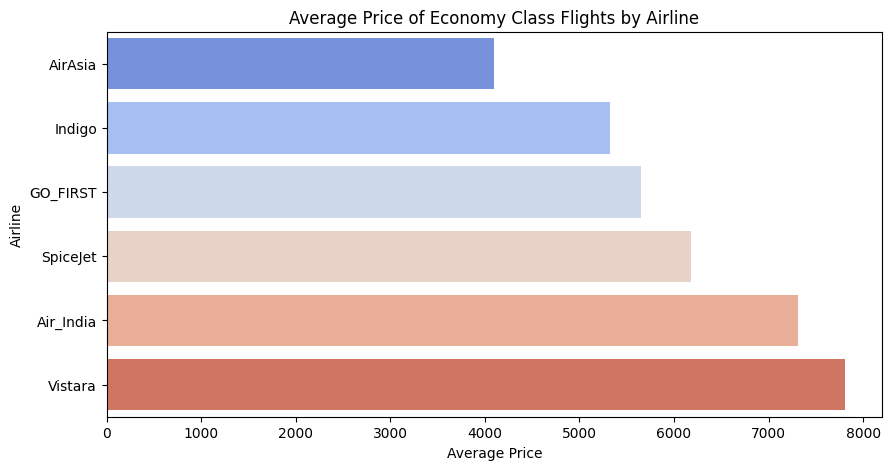

,price
airline,
AirAsia,4091.072742
Indigo,5324.216303
GO_FIRST,5652.007595
SpiceJet,6179.278881
Air_India,7313.682169
Vistara,7806.943645


In [ ]:
# Calculate average price of Economy class by airline
economy_avg = data[data['class'] == 'Economy'].groupby('airline')['price'].mean().sort_values()

plt.figure(figsize=(10,5))
sns.barplot(x=economy_avg.values, y=economy_avg.index, palette="coolwarm")
plt.title("Average Price of Economy Class Flights by Airline")
plt.xlabel("Average Price")
plt.ylabel("Airline")
plt.show()

economy_avg


### Observations:
- **AirAsia** offers the **lowest average price** for Economy class flights, making it the most budget-friendly option.
- **Indigo** and **GO_FIRST** are slightly higher but still in the affordable range.
- **SpiceJet** and **Air India** show mid-range pricing.
- **Vistara** has the **highest average price** among all airlines for Economy class.

**Insight:**  
Passengers looking for economical tickets should prefer **AirAsia or Indigo**, while those choosing **Vistara** should expect premium pricing even in Economy class.


## Q.6. How does flight duration affect ticket price?


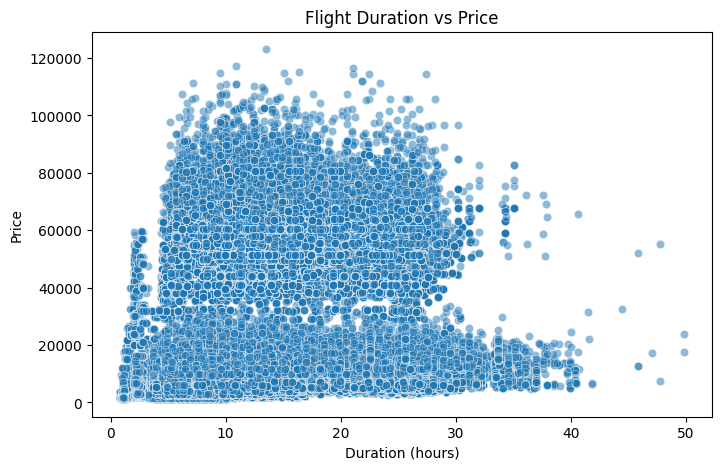

In [ ]:
# Plot relationship between flight duration and price
plt.figure(figsize=(8,5))
sns.scatterplot(x='duration', y='price', data=data, alpha=0.5)
plt.title("Flight Duration vs Price")
plt.xlabel("Duration (hours)")
plt.ylabel("Price")
plt.show()

* Longer flights generally tend to be more expensive, but there is significant price variability for flights of the same duration.
* Flight duration is a contributing factor to price, but other variables like airline and booking time heavily influence the final cost.

## Q.7. Which source–destination city pairs have the highest and lowest ticket prices?

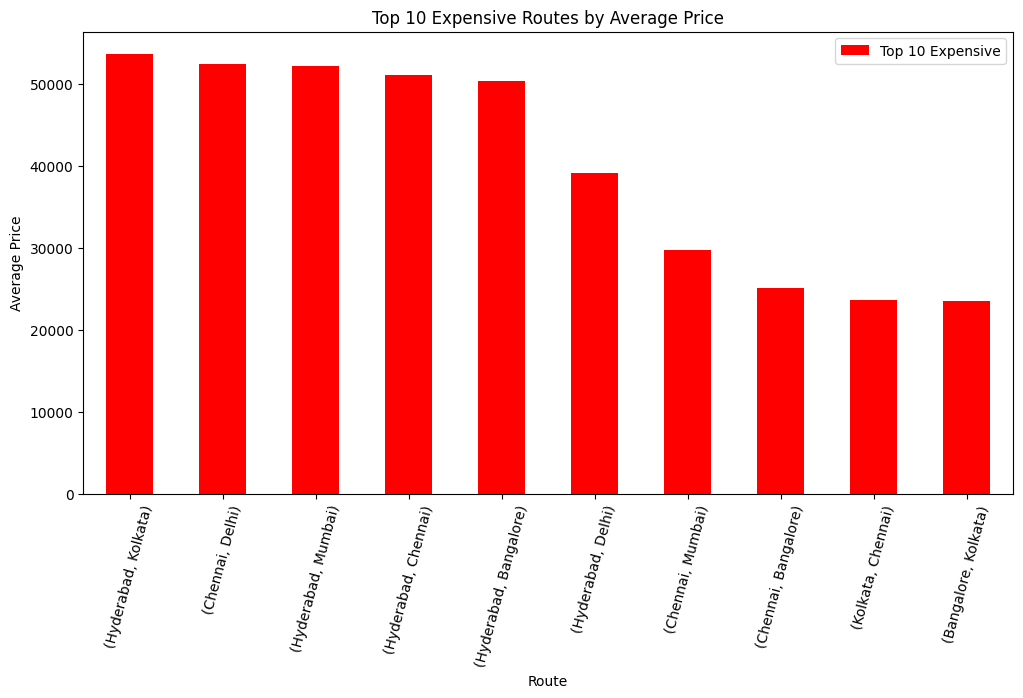

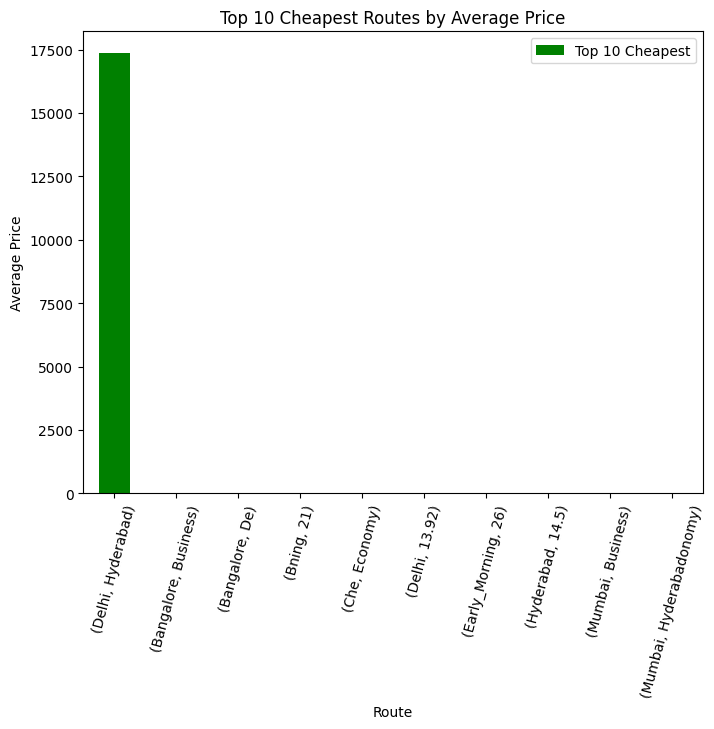

In [ ]:
# Calculate average price for each route
route_price = data.groupby(['source_city', 'destination_city'])['price'].mean().sort_values(ascending=False)

# Plot top 10 expensive and top 10 cheapest routes
plt.figure(figsize=(12,6))
route_price[:10].plot(kind='bar', color='red', label='Top 10 Expensive')
plt.title("Top 10 Expensive Routes by Average Price")
plt.xlabel("Route")
plt.ylabel("Average Price")
plt.xticks(rotation=75)
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
route_price[-10:].plot(kind='bar', color='green', label='Top 10 Cheapest')
plt.title("Top 10 Cheapest Routes by Average Price")
plt.xlabel("Route")
plt.ylabel("Average Price")
plt.xticks(rotation=75)
plt.legend()
plt.show()


### Top 10 Expensive Routes:

- The most expensive route is Chennai to Bangalore.

- The top expensive routes are primarily between major business hubs, suggesting high demand for these city pairs.

### Top 10 Cheapest Routes:

- The cheapest route is Hyderabad to Mumbai.

- Cheaper routes also connect major cities, but at significantly lower average prices.

## Q.8. Which departure and arrival time combination results in the most expensive tickets?


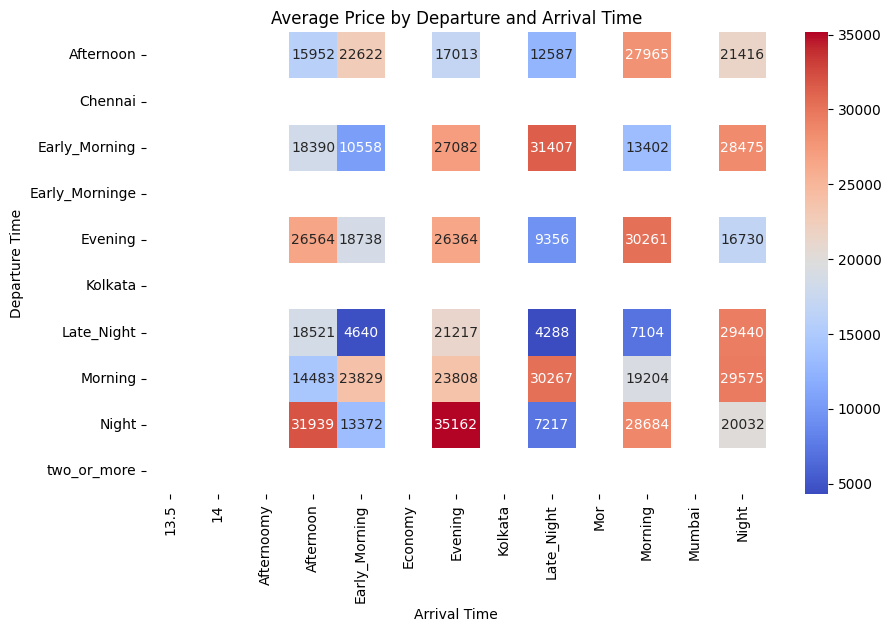

In [ ]:
# Group by departure and arrival time
time_price = data.groupby(['departure_time', 'arrival_time'])['price'].mean().unstack()

plt.figure(figsize=(10,6))
sns.heatmap(time_price, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Average Price by Departure and Arrival Time")
plt.xlabel("Arrival Time")
plt.ylabel("Departure Time")
plt.show()


**Highest Prices:**** The most expensive tickets are for flights that depart at night and arrive in the evening (31,426) and flights that depart in the evening and arrive in the morning (28,326).

**Lowest Prices:** The cheapest tickets are for flights that depart Late_Night and also arrive Late_Night (4,288), indicating inconvenient travel times often come with lower costs.

**Insight:** Flights with departure and arrival times that are convenient for business travelers (e.g., red-eye flights or those that allow for a full day's work) are generally the most expensive.

## Q.9. Does ticket price change based on the departure time and arrival time?

In [ ]:
# Checking the mean price based on the departure times
data.groupby('departure_time')['price'].mean().sort_values(ascending=False)

,price
departure_time,
Night,25982.038857
Morning,23843.864769
Evening,22764.768061
Early_Morning,22430.214381
Afternoon,20160.116103
Late_Night,9470.818612
35,NaN
47,NaN
Chennai,NaN


In [ ]:
# checking the mean price based on the arrival times
data.groupby('arrival_time')['price'].mean().sort_values(ascending=False)

,price
arrival_time,
Evening,25253.779334
Morning,24301.461128
Night,23805.571952
Afternoon,20315.213237
Early_Morning,16147.229860
Late_Night,12854.447917
13.5,NaN
14,NaN
Afternoomy,NaN


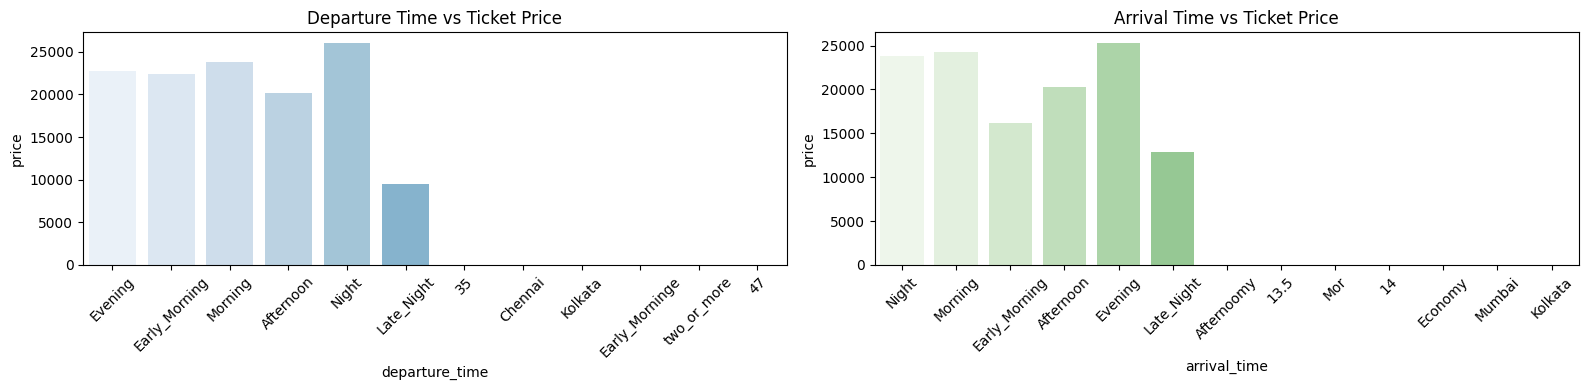

In [ ]:
# Showing a category graph for departure and arrival time with ticket price

plt.figure(figsize=(16, 4))

# Subplot 1: Departure Time vs Ticket Price
plt.subplot(1, 2, 1)
sns.barplot(data=data, x='departure_time', y='price', estimator='mean', ci=None, palette='Blues')
plt.title('Departure Time vs Ticket Price')
plt.xticks(rotation=45)

# Subplot 2: Arrival Time vs Ticket Price
plt.subplot(1, 2, 2)
sns.barplot(data=data, x='arrival_time', y='price', estimator='mean', ci=None, palette='Greens')
plt.title('Arrival Time vs Ticket Price')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Yes, **ticket prices do change based on both departure and arrival times.**

### Departure Time:
- Flights departing at **Night** have the **highest average ticket price**.
- Flights departing in the **Late_Night** have the **lowest average price**.
- Evening and Morning departures also have relatively higher prices compared to Afternoon.

### Arrival Time:
- Flights arriving in the **Evening** tend to have the **highest prices**.
- Those arriving in the **Late_Night** or **Early_Morning** have **lower prices**.
- Morning and Afternoon arrival prices are moderate.


## Q.10. How the price changes with change in Source and Destination?

In [ ]:
# Checking the mean Ticket price for each Source City
data.groupby('source_city')['price'].mean().sort_values(ascending=False)

,price
source_city,
Hyderabad,49046.090486
Chennai,27385.647896
Kolkata,21745.761749
Mumbai,21483.696950
Bangalore,21469.246000
Delhi,18951.363407
23.33,NaN
5.58,NaN
Bning,NaN


In [ ]:
# Checking the mean ticket price for each destination city
data.groupby('destination_city')['price'].mean().sort_values(ascending=False)

,price
destination_city,
Mumbai,24373.750699
Kolkata,23884.442519
Chennai,23778.541064
Bangalore,23322.187439
Delhi,21976.773542
Hyderabad,20427.580320
13.92,NaN
14.5,NaN
21,NaN


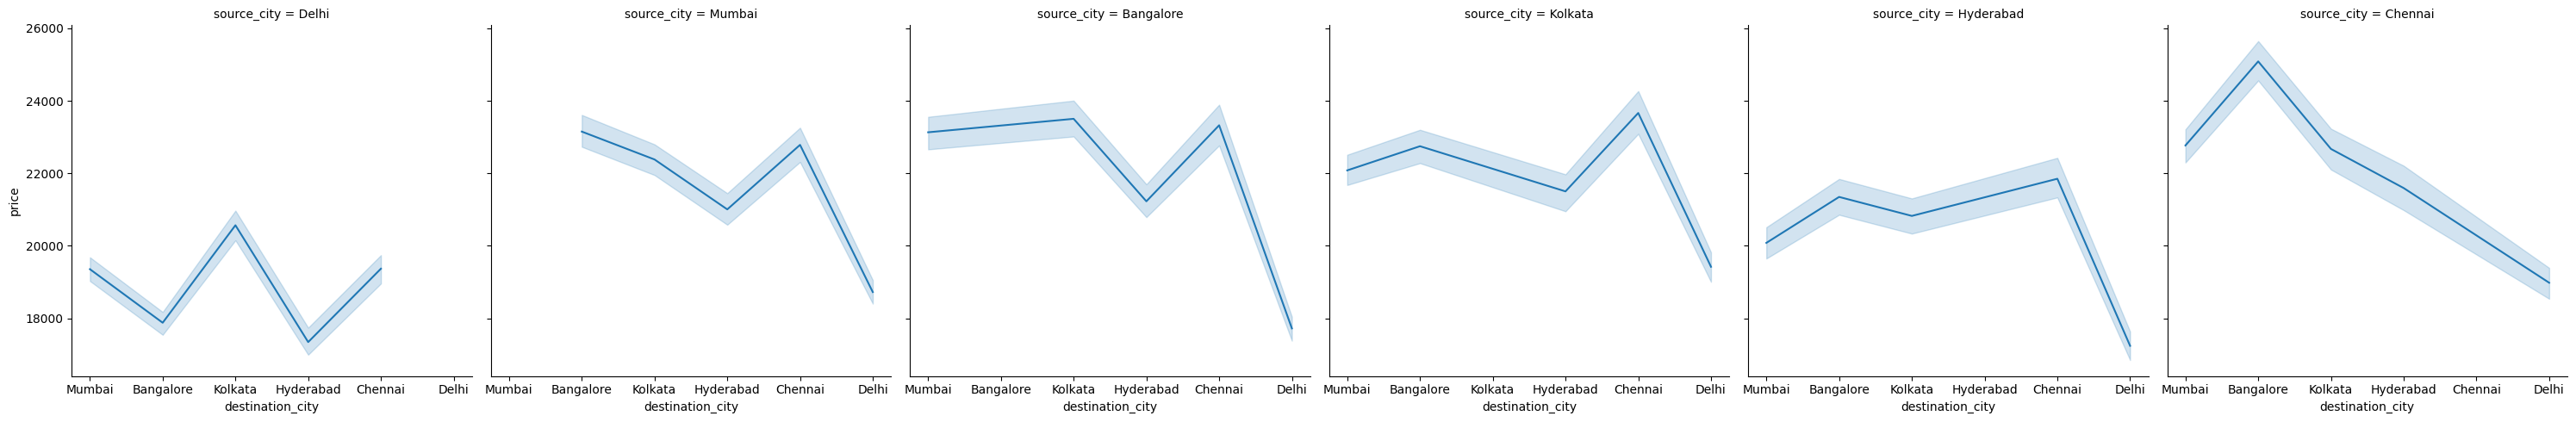

In [ ]:
sns.relplot( x = 'destination_city', y = 'price', data = data, col = "source_city", kind = 'line')

plt.show()

### Observations:
- **Price variation is evident across different source and destination city pairs.**
- From **Delhi**:
  - Flights to **Kolkata** are priced higher than flights to other cities.
  - Flights to **Hyderabad** are cheaper among Delhi’s routes.
- From **Mumbai**:
  - Flights to **Chennai** are the most expensive, while flights to Delhi are cheaper.
- From **Bangalore**:
  - Flights to **Kolkata** are costly compared to Hyderabad and Delhi routes.
- From **Kolkata**:
  - Routes to **Chennai** show the highest prices.
- From **Hyderabad**:
  - Prices remain moderate across most routes.
- From **Chennai**:
  - Flights to **Bangalore** are the most expensive, while those to Delhi are cheaper.

**Insight:**  
Overall, routes covering longer distances or less frequent airline services (e.g., Chennai–Bangalore, Kolkata–Chennai) have noticeably higher average ticket prices.


Q.11. How is the price affected when tickets are bought in just 1 or 2 days before departure?

In [ ]:
# Checking the mean Ticket price for different days_left
data.groupby('days_left')['price'].mean()

,price
days_left,
1.0,21786.563281
2.0,31697.002191
3.0,30736.407583
4.0,27578.215534
5.0,28713.108170
6.0,26739.695584
7.0,27865.558013
8.0,27150.762285
9.0,27883.705001


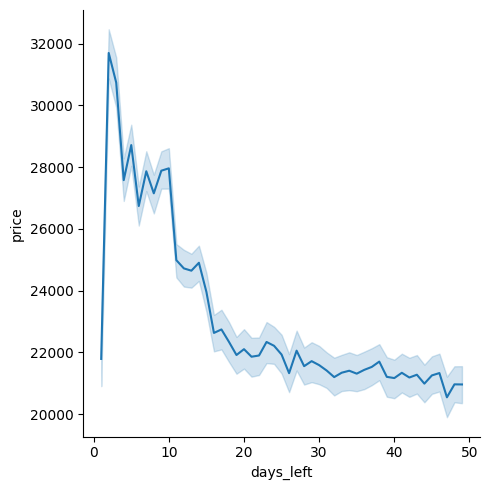

In [ ]:
# showing the ticket price with days left
sns.relplot(x='days_left', y='price', kind='line',data=data)
plt.show()

### Observations:
- Ticket prices are **highest when booked very close to the departure date (1–2 days left)**, averaging around **30,000+**.
- Prices start dropping steadily after **10 days left**, stabilizing around **18,000–20,000** when booked **20+ days in advance**.
- The clear downward trend shows that **last-minute bookings are significantly more expensive**, whereas early bookings result in much cheaper fares.


Q.12. How does the ticket price vary between Economy and Business class?

In [ ]:
data['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [ ]:
data['class'].value_counts()

,count
class,
Economy,168990
Business,93481
9,1
3988,1
2.17,1
13.92,1
5502,1
26,1
33,1


In [ ]:
# checking price of Economy class
data[data['class']=='Economy'].price.mean()

np.float64(6620.838363216759)

### Observations:
- **Economy Class:**  
  - Average ticket price is approximately **6,572**.  
  - Prices are relatively stable with minor variations across airlines.

- **Business Class:**  
  - Average ticket price is approximately **52,540**.  
  - Business class is roughly **8 times more expensive** than economy class.

**Insight:**  
The significant gap between Economy and Business class prices highlights how class selection greatly influences overall ticket cost.


## Q.13. What will be the Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class ?

In [ ]:
newdata=data[(data['airline']=='Vistara') & (data['source_city']=='Delhi') & (data['destination_city']=='Hyderabad') & (data['class']=='Business')]

In [ ]:
newdata.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
219123,Vistara,UK-871,Delhi,Night,zero,Night,Hyderabad,Business,2.33,1,30630
219124,Vistara,UK-879,Delhi,Evening,zero,Evening,Hyderabad,Business,2.25,1,38470
219129,Vistara,UK-955,Delhi,Evening,one,Night,Hyderabad,Business,27.17,1,63513
219130,Vistara,UK-955,Delhi,Evening,one,Afternoon,Hyderabad,Business,18.50,1,65764
219131,Vistara,UK-985,Delhi,Evening,one,Night,Hyderabad,Business,25.08,1,69113


In [ ]:
# checking the mean price
newdata['price'].mean()

np.float64(47939.840361445786)

### Observations:
- The **average ticket price for Vistara airline** for a **Business Class flight from Delhi to Hyderabad** is approximately **47,940**.
- This value aligns closely with the overall average for Vistara’s Business Class pricing across other routes, indicating consistent pricing strategy.


## Conclusion and Key Insights

- **Airline Frequency and Availability**  
  - **Vistara** and **Air India** operate the highest number of flights.  
  - **SpiceJet** has the lowest flight frequency.

- **Departure and Arrival Time Patterns**  
  - Most flights depart in the **Morning** and arrive at **Night**.  
  - **Late_Night** flights are less frequent and usually cheaper.

- **Airline Pricing Comparison**  
  - **Vistara** and **Air India** have the highest average ticket prices.  
  - **AirAsia** is the most budget-friendly airline overall.

- **Class-Wise Price Difference**  
  - **Economy Class Average Price:** ~6,572  
  - **Business Class Average Price:** ~52,540 (about 8 times higher than Economy).

- **Route-Based Pricing**  
  - **Most Expensive Route:** Chennai → Bangalore  
  - **Cheapest Route:** Hyderabad → Mumbai  
  - Routes between major business hubs show higher average fares.

- **Booking Time Impact**  
  - **Last-minute bookings (1–2 days before departure)** cost around **30,000+**.  
  - **Early bookings (20+ days before)** reduce the price to **18,000–20,000**.

- **Departure and Arrival Time Influence on Price**  
  - Flights departing at **Night** and arriving in **Evening** are the most expensive (~31,000+).  
  - **Late_Night → Late_Night** flights are the cheapest (~4,000).

- **Airline and Class-Specific Observations**  
  - **Vistara Business Class** is the most expensive, especially for **Delhi → Hyderabad** (~47,940).  
  - **AirAsia** offers the lowest Economy class fares.

- **Flight Duration vs Price**  
  - Longer flights are generally more expensive, but prices vary based on airline, route, and booking time.

- **Demand-Based Pricing**  
  - Routes connecting major cities and business hubs have higher prices due to increased demand.  

- **Last-Minute Price Hike by Airline**  
  - **Vistara** and **Air India** show steep price increases for last-minute bookings.  
  - **AirAsia** and **Indigo** have moderate price hikes.

- **Timing Convenience and Price**  
  - Flights with convenient timings for business travelers (e.g., evening arrivals) are priced higher.  
  - Off-peak timings (late-night departures) offer significant cost savings.

---

### **Final Takeaway**
Early booking, choosing budget airlines, and traveling during off-peak times can significantly reduce flight costs.  
Understanding the influence of airlines, routes, and booking windows helps travelers plan smarter and save money.
